# Функции активации

## Sigmoid

<img src='images/sigmoid.jpeg'>

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

Проблемы сигмоиды: 

* очень сильно насыщаются градиенты на ее концах;
* выходные значения сигмоиды с дальнейшем прохождением по слоям перестают быть центрированы нулём.

## Tanh

<img src='images/tanh.jpeg'>

$$  tanh(x) = 2\sigma(2x) − 1 $$

Градиенты тоже насыщаются по краям, но из-за переноса значений на отрезок $[-1, 1]$ с прохождением по слоям значения активаций остаются центрированы в нуле. 

Поэтому в выборе "сигмода или гиперболический тангенс" однозначно побеждает последний.

## ReLU

<img src='images/relu.jpeg'>

$$ relu(x) = max(0; x) $$ 

Плюсы и минусы использования ReLU:

* __(+)__ В процессе обучения функция потерь сходится очень быстро из-за линейной, ненасыщаемой формы ReLU.
* __(+)__ Очень легко вычислима, нет дорогостоящих операций вроде нахождения экспоненты.
* __(-)__ Нейроны могут "умереть" :(. Из-за большого значения градиента в процессе backprop может случиться так, что нейрон никогда не активируется снова на любом из примеров выборки.

## Leaky ReLU

<img src='images/leaky_relu.jpeg'>

$$ leaky\_relu(x) = \mathbb{1}(x < 0)(\alpha x) + \mathbb{1}(x \ge 0)(x) $$

где $\alpha \space -$ некоторая малая константа, например, 0.01.

Попытка устранить проблему "мертвых" нейронов. Есть и модификации, например, вынесение значения $\alpha$ в параметр нейрона, чтобы тот также подстраивался к лучшему значению в процессе обучения.

Так или иначе, результаты такого улучшения строго не доказаны и не консистентны от задачи к задаче.

## ELU и SoftPlus

### ELU

<img src='images/elu.png'>

$$ y = \mathbb{1}(x < 0)(\alpha(e^x - 1)) + \mathbb{1}(x \ge 0)(x)$$

Результаты [немного лучше, чем у ReLU](http://image-net.org/challenges/posters/JKU_EN_RGB_Schwarz_poster.pdf).

### SoftPlus

<img src='images/softplus.png'>

$$ softplus(x) = \ln(e^x + 1) $$

### Использовать или нет?

В Deep Learning Book [указано](https://stats.stackexchange.com/a/286358), что, опять же, не всегда и не подтверждено. 

## SELU

<img src='images/selu.png' width='60%'>

$$ selu(x) = \lambda(\space \mathbb{1}(x \le 0)(\alpha e^x - \alpha) \space + \space \mathbb{1}(x > 0)(x) ) $$

$$ \lambda = 1.0507009873554804934193349852946 $$
$$ \alpha = 1.6732632423543772848170429916717 $$

По сути имеем дело с немного измененной версией ELU с той лишь разницей, что добавлен множитель $\lambda$ в начале и подстроено значение $\alpha$.

Говорят, что и быстрее сходится, и точнее получается все. Время покажет :)

## Softmax

$$ \sigma(z)_i = \frac{e^{z_i}}{\sum_{k=1}^K e^{z_k}} $$

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

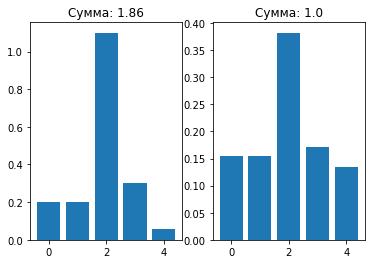

In [4]:
a = np.array([0.2, 0.2, 1.1, 0.3, 0.06])
s = softmax(a)

plt.subplot(121)
plt.bar(range(len(a)), a)
plt.title('Сумма: {}'.format(np.sum(a)))
plt.subplot(122)
plt.bar(range(len(s)), s)
plt.title('Сумма: {}'.format(np.sum(s)))
plt.show()

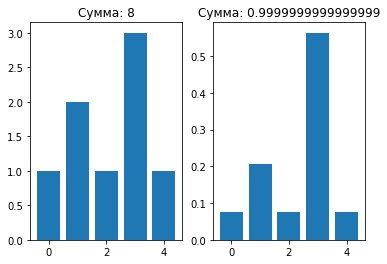

In [5]:
a = np.array([1, 2, 1, 3, 1])
s = softmax(a)

plt.subplot(121)
plt.bar(range(len(a)), a)
plt.title('Сумма: {}'.format(np.sum(a)))
plt.subplot(122)
plt.bar(range(len(s)), s)
plt.title('Сумма: {}'.format(np.sum(s)))
plt.show()